# 传统特征提取详解（第三部分：LBP、ORB、SURF等）

## 📋 文档说明

本文档是传统特征提取的第三部分，专门详细讲解LBP（局部二值模式）、ORB（Oriented FAST and Rotated BRIEF）、SURF（Speeded Up Robust Features）等其他传统特征提取方法的原理、数学推导和实现细节。通过本文档，你将能够：

1. **深入理解LBP特征提取的原理**：从数学基础到实现细节，全面掌握LBP特征提取方法
2. **掌握ORB特征提取的完整流程**：包括FAST角点检测、BRIEF描述符、方向计算等所有步骤的详细数学推导
3. **理解SURF特征提取的原理**：理解SURF如何改进SIFT，提高计算效率
4. **了解其他传统特征提取方法**：Harris角点检测、FAST角点检测等方法的工作原理和应用
5. **了解这些方法在VLA中的意义**：理解传统特征提取方法对理解深度学习方法的意义

**学习方式**：本文件是Jupyter Notebook格式，你可以边看边运行代码，通过可视化图表和数学推导更好地理解这些特征提取方法的原理和过程。

**文档结构**：
- **第一部分**：SIFT特征提取的详细讲解（见传统特征提取详解_1.ipynb）
- **第二部分**：HOG特征提取的详细讲解（见传统特征提取详解_2.ipynb）
- **第三部分（本文档）**：LBP、ORB、SURF等其他传统特征提取方法的详细讲解

---

## 📚 术语表（按出现顺序）

### 1. LBP特征 (LBP Features)
- **中文名称**：LBP特征
- **英文全称**：Local Binary Pattern Features
- **定义**：LBP（局部二值模式）是一种用于纹理分析的特征描述方法，由Ojala等人在1994年提出。LBP特征通过比较中心像素与其邻域像素的灰度值，生成一个二值模式，然后统计这个二值模式的分布来描述图像的纹理特征。LBP特征提取包括以下步骤：1）选择邻域：选择中心像素周围的邻域像素（通常为8个邻域像素）；2）二值化：将邻域像素的灰度值与中心像素的灰度值比较，大于等于中心像素的为1，小于的为0；3）生成二值模式：将二值化的结果按顺序排列，形成一个二进制数；4）转换为十进制：将二进制数转换为十进制数，得到LBP码；5）统计直方图：统计图像中所有像素的LBP码，形成LBP直方图；6）特征向量生成：将LBP直方图作为特征向量。LBP特征对光照变化具有较好的鲁棒性，计算简单高效，在纹理分类、人脸识别等任务中取得了很好的效果。LBP特征的优点是计算简单、对光照变化鲁棒、旋转不变性（通过旋转不变LBP实现），缺点是表达能力有限、对噪声敏感。
- **核心组成**：LBP特征的核心组成包括：1）邻域选择：选择中心像素周围的邻域像素，通常为圆形邻域或方形邻域；2）二值化：将邻域像素的灰度值与中心像素的灰度值比较，生成二值模式；3）LBP码生成：将二值模式转换为十进制数，得到LBP码；4）直方图统计：统计图像中所有像素的LBP码，形成LBP直方图；5）旋转不变性：通过旋转不变LBP实现旋转不变性；6）多尺度LBP：通过不同半径的邻域实现多尺度LBP。LBP特征通过局部二值模式描述图像的纹理特征，这种方法对光照变化具有较好的鲁棒性，计算简单高效。
- **在VLA中的应用**：在VLA中，LBP特征虽然不直接使用，但理解LBP特征的原理有助于理解特征提取的基本思想。LBP特征的局部二值模式、纹理描述等思想在深度学习方法中也有体现，例如CNN的卷积层可以看作是在提取局部特征，ViT的注意力机制可以看作是在统计特征之间的关系。理解LBP特征有助于理解VLA模型如何从图像中提取特征，如何描述图像的纹理信息。在某些VLA应用中，LBP特征仍然有用，例如用于纹理分析、特征匹配等辅助任务。此外，LBP特征的旋转不变性思想在深度学习的旋转不变性设计中也有体现，理解LBP特征有助于理解这些设计。
- **相关概念**：纹理分析、局部特征描述、二值模式、直方图统计、旋转不变性、多尺度特征
- **首次出现位置**：本文档标题
- **深入学习**：参考父目录的[图像特征提取详解](../图像特征提取详解.ipynb)和[传统特征提取详解_1](./传统特征提取详解_1.ipynb)、[传统特征提取详解_2](./传统特征提取详解_2.ipynb)
- **直观理解**：想象LBP特征就像用二进制编码描述每个像素周围的"纹理模式"，就像用0和1编码描述一个图案一样。LBP特征通过比较中心像素与其邻域像素的灰度值，生成一个二值模式，然后统计这个二值模式的分布来描述图像的纹理特征。LBP特征对光照变化具有较好的鲁棒性，计算简单高效，在纹理分类等任务中取得了很好的效果。

### 2. ORB特征 (ORB Features)
- **中文名称**：ORB特征
- **英文全称**：Oriented FAST and Rotated BRIEF Features
- **定义**：ORB（Oriented FAST and Rotated BRIEF）是一种快速的特征检测和描述方法，由Rublee等人在2011年提出。ORB结合了FAST角点检测和BRIEF描述符，并添加了方向信息，实现了快速、鲁棒的特征提取。ORB特征提取包括以下步骤：1）FAST角点检测：使用FAST算法检测图像中的角点；2）方向计算：为每个角点计算主方向，使用灰度质心法；3）BRIEF描述符：在旋转后的图像块上计算BRIEF描述符；4）特征匹配：使用汉明距离进行特征匹配。ORB特征的优点是计算速度快、对旋转和尺度变化具有鲁棒性、不需要训练，缺点是表达能力有限、对光照变化敏感。ORB特征在实时应用、SLAM、增强现实等任务中广泛应用。
- **核心组成**：ORB特征的核心组成包括：1）FAST角点检测：使用FAST算法快速检测图像中的角点，FAST算法通过比较像素与其周围像素的灰度值来检测角点；2）方向计算：为每个角点计算主方向，使用灰度质心法计算角点的方向；3）BRIEF描述符：在旋转后的图像块上计算BRIEF描述符，BRIEF描述符通过比较图像块中随机点对的灰度值生成二进制描述符；4）旋转不变性：通过旋转图像块实现旋转不变性；5）特征匹配：使用汉明距离进行特征匹配，汉明距离是两个二进制字符串不同位的数量；6）多尺度检测：通过图像金字塔实现多尺度检测。ORB特征通过结合FAST角点检测和BRIEF描述符，实现了快速、鲁棒的特征提取。
- **在VLA中的应用**：在VLA中，ORB特征虽然不直接使用，但理解ORB特征的原理有助于理解特征提取的基本思想。ORB特征的角点检测、方向计算、二进制描述符等思想在深度学习方法中也有体现，例如CNN的卷积层可以看作是在检测局部特征，ViT的注意力机制可以看作是在计算特征之间的关系。理解ORB特征有助于理解VLA模型如何从图像中提取特征，如何描述图像的局部信息。在某些VLA应用中，ORB特征仍然有用，例如用于特征匹配、SLAM等辅助任务。此外，ORB特征的快速计算思想在深度学习的效率优化中也有体现，理解ORB特征有助于理解这些优化技术。
- **相关概念**：FAST角点检测、BRIEF描述符、角点检测、特征描述符、特征匹配、汉明距离
- **首次出现位置**：本文档第2节
- **深入学习**：参考本文档的ORB特征提取详细讲解部分
- **直观理解**：想象ORB特征就像快速找到图像中的"关键点"（角点），然后用二进制编码描述这些关键点的特征。ORB特征结合了FAST角点检测（快速找到关键点）和BRIEF描述符（用二进制编码描述特征），并添加了方向信息，实现了快速、鲁棒的特征提取。ORB特征在实时应用、SLAM等任务中广泛应用。

### 3. SURF特征 (SURF Features)
- **中文名称**：SURF特征
- **英文全称**：Speeded Up Robust Features
- **定义**：SURF（加速鲁棒特征）是一种改进SIFT的特征检测和描述方法，由Bay等人在2006年提出。SURF通过使用积分图像和盒式滤波器加速计算，在保持SIFT的鲁棒性的同时，大幅提高了计算速度。SURF特征提取包括以下步骤：1）积分图像：使用积分图像加速卷积计算；2）盒式滤波器：使用盒式滤波器近似高斯滤波器，加速尺度空间构建；3）Hessian矩阵：使用Hessian矩阵检测关键点；4）方向分配：使用Haar小波响应计算主方向；5）SURF描述符：使用Haar小波响应生成64维或128维的描述符；6）特征匹配：使用欧氏距离进行特征匹配。SURF特征的优点是计算速度快（比SIFT快3-5倍）、对旋转和尺度变化具有鲁棒性、对光照变化具有鲁棒性，缺点是表达能力不如SIFT、对模糊敏感。SURF特征在目标识别、图像匹配等任务中广泛应用。
- **核心组成**：SURF特征的核心组成包括：1）积分图像：使用积分图像在常数时间内计算任意矩形区域的像素和，加速卷积计算；2）盒式滤波器：使用盒式滤波器（box filter）近似高斯滤波器，盒式滤波器可以通过积分图像快速计算；3）Hessian矩阵：使用Hessian矩阵检测关键点，Hessian矩阵的行列式值表示关键点的强度；4）尺度空间：通过不同尺度的盒式滤波器构建尺度空间；5）方向分配：使用Haar小波响应计算主方向，Haar小波响应可以通过积分图像快速计算；6）SURF描述符：使用Haar小波响应生成描述符，描述符的维度为64或128。SURF特征通过使用积分图像和盒式滤波器加速计算，在保持SIFT的鲁棒性的同时，大幅提高了计算速度。
- **在VLA中的应用**：在VLA中，SURF特征虽然不直接使用，但理解SURF特征的原理有助于理解特征提取的基本思想。SURF特征的尺度空间构建、关键点检测、方向分配、描述符生成等思想在深度学习方法中也有体现，例如CNN的卷积层可以看作是在提取多尺度特征，ViT的注意力机制可以看作是在计算特征之间的关系。理解SURF特征有助于理解VLA模型如何从图像中提取特征，如何描述图像的多尺度信息。在某些VLA应用中，SURF特征仍然有用，例如用于特征匹配、目标识别等辅助任务。此外，SURF特征的加速计算思想在深度学习的效率优化中也有体现，理解SURF特征有助于理解这些优化技术。
- **相关概念**：SIFT特征、积分图像、盒式滤波器、Hessian矩阵、尺度空间、Haar小波、特征描述符
- **首次出现位置**：本文档第3节
- **深入学习**：参考本文档的SURF特征提取详细讲解部分和[传统特征提取详解_1](./传统特征提取详解_1.ipynb)中的SIFT特征提取
- **直观理解**：想象SURF特征就像SIFT特征的"加速版"，通过使用更高效的计算方法（积分图像、盒式滤波器），在保持SIFT的鲁棒性的同时，大幅提高了计算速度。SURF特征通过使用积分图像和盒式滤波器加速计算，在保持SIFT的鲁棒性的同时，计算速度比SIFT快3-5倍，在目标识别、图像匹配等任务中广泛应用。

### 4. FAST角点检测 (FAST Corner Detection)
- **中文名称**：FAST角点检测
- **英文全称**：Features from Accelerated Segment Test Corner Detection
- **定义**：FAST（加速段测试）是一种快速角点检测算法，由Rosten和Drummond在2006年提出。FAST算法通过比较像素与其周围像素的灰度值来检测角点，计算速度快，适合实时应用。FAST角点检测的原理是：对于图像中的每个像素，检查其周围16个像素（或12个、8个像素）中是否有连续n个像素（通常为9个）的灰度值都大于或小于中心像素的灰度值加上阈值，如果有，则该像素是角点。FAST角点检测的优点是计算速度快、对光照变化具有鲁棒性、不需要训练，缺点是对噪声敏感、不是旋转不变的。FAST角点检测在实时应用、SLAM、增强现实等任务中广泛应用，是ORB特征的基础。
- **核心组成**：FAST角点检测的核心组成包括：1）圆形邻域：选择中心像素周围的圆形邻域，通常为16个像素；2）阈值比较：将邻域像素的灰度值与中心像素的灰度值加上阈值进行比较；3）连续像素检测：检测是否有连续n个像素满足条件；4）非极大值抑制：使用非极大值抑制去除重复检测的角点；5）快速拒绝：使用快速拒绝策略加速检测，先检查几个关键像素，如果不满足条件则快速拒绝；6）多尺度检测：通过图像金字塔实现多尺度检测。FAST角点检测通过快速比较像素与其周围像素的灰度值来检测角点，计算速度快，适合实时应用。
- **在VLA中的应用**：在VLA中，FAST角点检测虽然不直接使用，但理解FAST角点检测的原理有助于理解特征提取的基本思想。FAST角点检测的快速计算、局部特征检测等思想在深度学习方法中也有体现，例如CNN的卷积层可以看作是在检测局部特征，ViT的注意力机制可以看作是在计算特征之间的关系。理解FAST角点检测有助于理解VLA模型如何从图像中提取特征，如何检测图像中的关键点。在某些VLA应用中，FAST角点检测仍然有用，例如用于特征匹配、SLAM等辅助任务。此外，FAST角点检测的快速计算思想在深度学习的效率优化中也有体现，理解FAST角点检测有助于理解这些优化技术。
- **相关概念**：角点检测、ORB特征、特征检测、非极大值抑制、图像金字塔、实时应用
- **首次出现位置**：本文档第2.1节
- **深入学习**：参考本文档的FAST角点检测详细讲解部分
- **直观理解**：想象FAST角点检测就像快速扫描图像，找到那些"突出"的点（角点），这些点通常是图像中变化较大的位置。FAST角点检测通过快速比较像素与其周围像素的灰度值来检测角点，计算速度快，适合实时应用，是ORB特征的基础。

### 5. BRIEF描述符 (BRIEF Descriptor)
- **中文名称**：BRIEF描述符
- **英文全称**：Binary Robust Independent Elementary Features Descriptor
- **定义**：BRIEF（二进制鲁棒独立基本特征）是一种快速的特征描述符，由Calonder等人在2010年提出。BRIEF描述符通过比较图像块中随机点对的灰度值生成二进制描述符，计算速度快，存储空间小。BRIEF描述符的生成过程是：1）选择随机点对：在图像块中选择n对随机点（通常为256对）；2）比较灰度值：比较每对点的灰度值，如果第一个点的灰度值大于第二个点的灰度值，则为1，否则为0；3）生成二进制字符串：将所有比较结果按顺序排列，形成一个二进制字符串；4）转换为描述符：将二进制字符串作为描述符。BRIEF描述符的优点是计算速度快、存储空间小、匹配速度快（使用汉明距离），缺点是不具有旋转不变性、对噪声敏感。BRIEF描述符在实时应用、SLAM等任务中广泛应用，是ORB特征的基础。
- **核心组成**：BRIEF描述符的核心组成包括：1）随机点对选择：在图像块中选择n对随机点，通常为256对；2）灰度值比较：比较每对点的灰度值，生成二进制位；3）二进制字符串生成：将所有比较结果按顺序排列，形成一个二进制字符串；4）描述符匹配：使用汉明距离进行描述符匹配，汉明距离是两个二进制字符串不同位的数量；5）旋转不变性：通过旋转图像块实现旋转不变性（在ORB中实现）；6）多尺度描述：通过图像金字塔实现多尺度描述。BRIEF描述符通过比较图像块中随机点对的灰度值生成二进制描述符，计算速度快，存储空间小。
- **在VLA中的应用**：在VLA中，BRIEF描述符虽然不直接使用，但理解BRIEF描述符的原理有助于理解特征提取的基本思想。BRIEF描述符的二进制编码、快速匹配等思想在深度学习方法中也有体现，例如CNN的卷积层可以看作是在提取局部特征，ViT的注意力机制可以看作是在计算特征之间的关系。理解BRIEF描述符有助于理解VLA模型如何从图像中提取特征，如何描述图像的局部信息。在某些VLA应用中，BRIEF描述符仍然有用，例如用于特征匹配、SLAM等辅助任务。此外，BRIEF描述符的快速计算思想在深度学习的效率优化中也有体现，理解BRIEF描述符有助于理解这些优化技术。
- **相关概念**：ORB特征、特征描述符、二进制编码、汉明距离、特征匹配、实时应用
- **首次出现位置**：本文档第2.2节
- **深入学习**：参考本文档的BRIEF描述符详细讲解部分
- **直观理解**：想象BRIEF描述符就像用二进制编码快速描述图像块的特征，就像用0和1编码描述一个图案的关键特征一样。BRIEF描述符通过比较图像块中随机点对的灰度值生成二进制描述符，计算速度快，存储空间小，在实时应用、SLAM等任务中广泛应用。

---

## 📋 概述

### 什么是LBP、ORB、SURF等传统特征提取方法

LBP、ORB、SURF等是传统特征提取方法，它们不依赖于深度学习，而是基于图像处理、信号处理、数学分析等传统技术。这些方法在深度学习兴起之前是计算机视觉的主流方法，虽然现在深度学习方法的性能更好，但理解这些方法有助于理解特征提取的基本原理。

### 为什么重要

虽然现代VLA模型通常使用深度学习方法，但理解这些传统特征提取方法仍然非常重要，原因包括：

1. **理解特征提取的基本思想**：这些方法的特征提取思想在深度学习方法中也有体现
2. **理解计算效率优化**：这些方法的效率优化思想有助于理解深度学习的效率优化
3. **辅助任务应用**：在某些VLA应用中，这些方法仍然有用
4. **理解设计思想**：理解这些方法有助于理解深度学习方法的设计思想

### 学习目标

通过本文档的学习，你将能够：

1. **深入理解LBP特征提取**：理解LBP特征的原理和计算方法
2. **掌握ORB特征提取**：理解ORB特征的完整流程
3. **理解SURF特征提取**：理解SURF如何改进SIFT
4. **了解其他传统方法**：了解Harris角点检测、FAST角点检测等方法

---

## 1. LBP特征提取详解

### 1.1 什么是LBP特征

**直观理解**：想象LBP特征就像用二进制编码描述每个像素周围的"纹理模式"，就像用0和1编码描述一个图案一样。LBP特征通过比较中心像素与其邻域像素的灰度值，生成一个二值模式，然后统计这个二值模式的分布来描述图像的纹理特征。

### 1.2 为什么需要LBP特征

LBP特征能够描述图像的纹理特征，对光照变化具有较好的鲁棒性，计算简单高效，在纹理分类、人脸识别等任务中取得了很好的效果。

### 1.3 LBP特征提取的数学推导详解

#### 1.3.1 从基础数学开始

**步骤1：理解二值化**

二值化是将连续值转换为二进制值的过程。对于LBP，我们将邻域像素的灰度值与中心像素的灰度值比较，大于等于中心像素的为1，小于的为0。

**步骤2：理解二进制数**

二进制数是由0和1组成的数，例如1011（二进制）表示 $1 \times 2^3 + 0 \times 2^2 + 1 \times 2^1 + 1 \times 2^0 = 11$（十进制）。

**步骤3：理解LBP码**

LBP码是将二值化的结果按顺序排列，形成一个二进制数，然后转换为十进制数得到的。

#### 1.3.2 LBP特征提取的数学表示

对于中心像素 $p_c$ 和其邻域像素 $p_i$（$i = 0, 1, \ldots, P-1$，$P$ 是邻域像素数），LBP码定义为：

$$\text{LBP}_{P,R} = \sum_{i=0}^{P-1} s(p_i - p_c) \times 2^i$$

其中：
- $s(x) = \begin{cases} 1 & \text{if } x \geq 0 \\ 0 & \text{if } x < 0 \end{cases}$ 是符号函数
- $P$ 是邻域像素数（通常为8）
- $R$ 是邻域半径（通常为1）

#### 1.3.3 LBP特征提取的具体计算过程

**示例：3×3图像块的LBP计算**

假设有一个3×3的图像块：

$$I = \begin{bmatrix}
10 & 20 & 30 \\
15 & 25 & 35 \\
20 & 30 & 40
\end{bmatrix}$$

**计算中心像素(1,1)的LBP码**：

1. **中心像素值**：$p_c = 25$

2. **邻域像素值**（按顺时针顺序）：
   - $p_0 = 20$（上）
   - $p_1 = 30$（右上）
   - $p_2 = 35$（右）
   - $p_3 = 30$（右下）
   - $p_4 = 20$（下）
   - $p_5 = 10$（左下）
   - $p_6 = 15$（左）
   - $p_7 = 20$（左上）

3. **二值化**：
   - $s(20-25) = s(-5) = 0$
   - $s(30-25) = s(5) = 1$
   - $s(35-25) = s(10) = 1$
   - $s(30-25) = s(5) = 1$
   - $s(20-25) = s(-5) = 0$
   - $s(10-25) = s(-15) = 0$
   - $s(15-25) = s(-10) = 0$
   - $s(20-25) = s(-5) = 0$

4. **二进制数**：$01110000$（从$p_0$开始，顺时针）

5. **LBP码**：$\text{LBP} = 0 \times 2^7 + 1 \times 2^6 + 1 \times 2^5 + 1 \times 2^4 + 0 \times 2^3 + 0 \times 2^2 + 0 \times 2^1 + 0 \times 2^0 = 112$

### 1.4 旋转不变LBP

#### 1.4.1 为什么需要旋转不变性

标准LBP对图像旋转敏感，旋转后的图像会产生不同的LBP码。

#### 1.4.2 旋转不变LBP的实现

旋转不变LBP通过循环移位找到最小的LBP码：

$$\text{LBP}_{P,R}^{ri} = \min\{\text{ROR}(\text{LBP}_{P,R}, i) | i = 0, 1, \ldots, P-1\}$$

其中 $\text{ROR}(x, i)$ 表示将二进制数 $x$ 循环右移 $i$ 位。

### 1.5 LBP特征提取的可视化

下面我们通过代码可视化LBP特征提取的过程：


In [1]:
# ============================================
# 导入必要的库
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import feature
from matplotlib.patches import Rectangle

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')
print("环境准备完成！")


环境准备完成！


C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1052301673.py:51: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1052301673.py:51: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1052301673.py:51: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1052301673.py:51: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1052301673.py:51: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1052301673.py:51: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891})

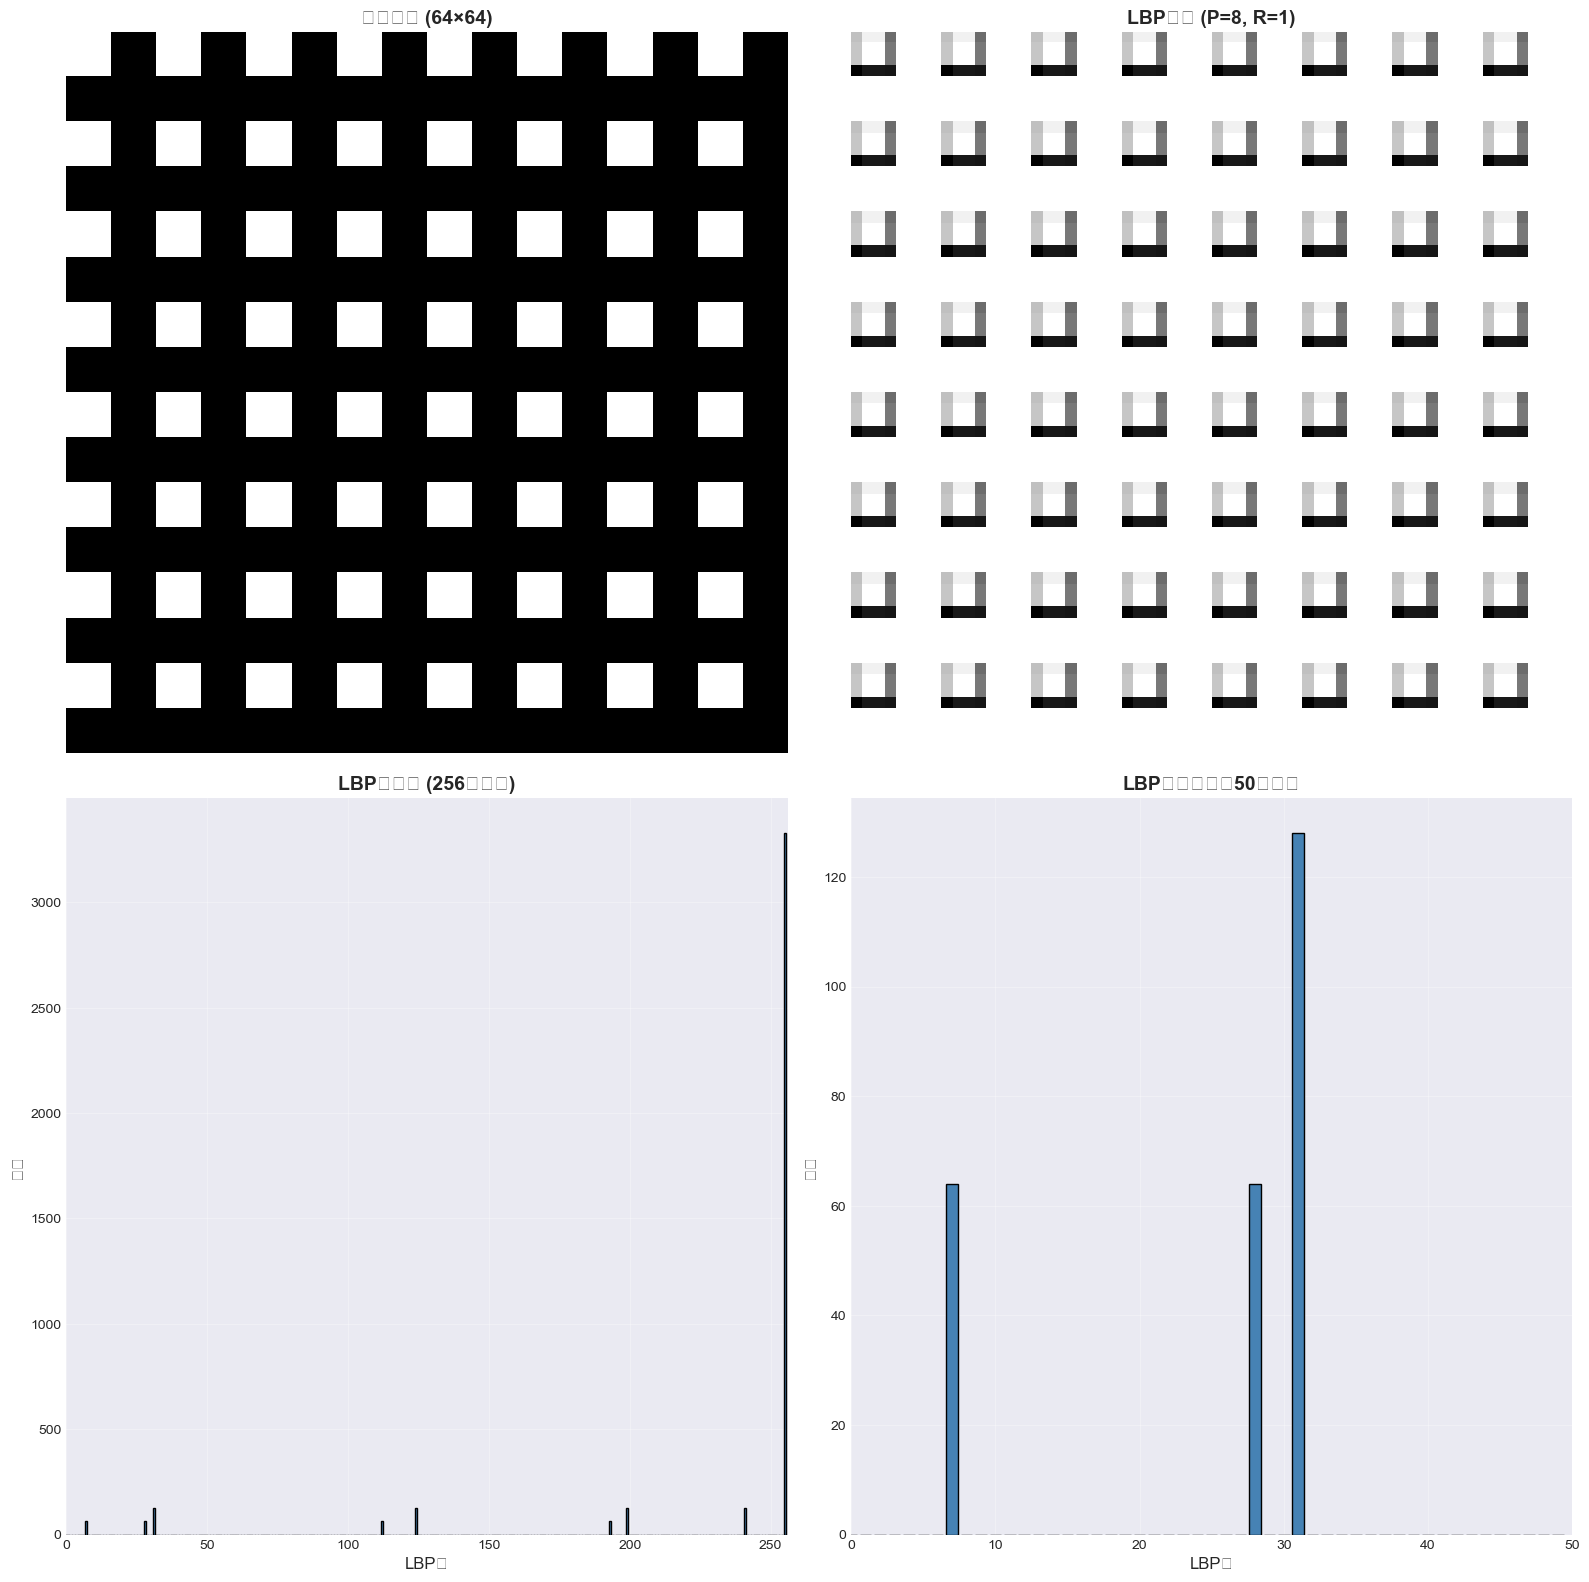

LBP特征提取可视化说明：
1. LBP图像显示了每个像素的LBP码
2. LBP直方图统计了图像中所有LBP码的分布
3. LBP特征对光照变化具有较好的鲁棒性
4. LBP特征计算简单高效，适合实时应用


In [2]:
# ============================================
# LBP特征提取可视化
# ============================================
# 这个示例展示了LBP特征提取的详细过程

# 创建一个测试图像（包含纹理）
test_image = np.zeros((64, 64))
# 添加纹理模式
for i in range(0, 64, 8):
    for j in range(0, 64, 8):
        test_image[i:i+4, j:j+4] = 1

# 转换为uint8格式
test_image_uint8 = (test_image * 255).astype(np.uint8)

# 计算LBP特征
lbp = feature.local_binary_pattern(test_image_uint8, P=8, R=1, method='default')

# 计算LBP直方图
hist, _ = np.histogram(lbp.ravel(), bins=256, range=(0, 256))

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# 原始图像
axes[0, 0].imshow(test_image, cmap='gray')
axes[0, 0].set_title('原始图像 (64×64)', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# LBP图像
axes[0, 1].imshow(lbp, cmap='gray')
axes[0, 1].set_title('LBP图像 (P=8, R=1)', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# LBP直方图
axes[1, 0].bar(range(256), hist, color='steelblue', edgecolor='black')
axes[1, 0].set_title('LBP直方图 (256个区间)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('LBP码', fontsize=12)
axes[1, 0].set_ylabel('频数', fontsize=12)
axes[1, 0].set_xlim(0, 256)
axes[1, 0].grid(True, alpha=0.3)

# LBP直方图（只显示前50个值，更清晰）
axes[1, 1].bar(range(50), hist[:50], color='steelblue', edgecolor='black')
axes[1, 1].set_title('LBP直方图（前50个值）', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('LBP码', fontsize=12)
axes[1, 1].set_ylabel('频数', fontsize=12)
axes[1, 1].set_xlim(0, 50)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("LBP特征提取可视化说明：")
print("=" * 60)
print("1. LBP图像显示了每个像素的LBP码")
print("2. LBP直方图统计了图像中所有LBP码的分布")
print("3. LBP特征对光照变化具有较好的鲁棒性")
print("4. LBP特征计算简单高效，适合实时应用")
print("=" * 60)


## 2. ORB特征提取详解

### 2.1 FAST角点检测详解

#### 2.1.1 什么是FAST角点检测

**直观理解**：想象FAST角点检测就像快速扫描图像，找到那些"突出"的点（角点），这些点通常是图像中变化较大的位置。

#### 2.1.2 FAST角点检测的原理

FAST角点检测的原理是：对于图像中的每个像素，检查其周围16个像素（或12个、8个像素）中是否有连续n个像素（通常为9个）的灰度值都大于或小于中心像素的灰度值加上阈值。

**数学表示**：

对于中心像素 $p$ 和其周围16个像素 $p_i$（$i = 0, 1, \ldots, 15$），如果存在连续9个像素满足：

$$|I(p_i) - I(p)| > t$$

其中 $t$ 是阈值，则 $p$ 是角点。

#### 2.1.3 FAST角点检测的具体计算过程

**示例：检测一个像素是否为角点**

假设中心像素的灰度值为 $I(p) = 100$，阈值为 $t = 20$，周围16个像素的灰度值为：

$$[80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]$$

**检测过程**：

1. **检查连续像素**：检查是否有连续9个像素满足 $|I(p_i) - 100| > 20$
2. **结果**：像素值在120-155之间的像素满足条件，共6个连续像素，不满足连续9个的要求
3. **结论**：该像素不是角点

### 2.2 BRIEF描述符详解

#### 2.2.1 什么是BRIEF描述符

**直观理解**：想象BRIEF描述符就像用二进制编码快速描述图像块的特征，就像用0和1编码描述一个图案的关键特征一样。

#### 2.2.2 BRIEF描述符的生成过程

BRIEF描述符的生成过程是：

1. **选择随机点对**：在图像块中选择n对随机点（通常为256对）
2. **比较灰度值**：比较每对点的灰度值，如果第一个点的灰度值大于第二个点的灰度值，则为1，否则为0
3. **生成二进制字符串**：将所有比较结果按顺序排列，形成一个二进制字符串
4. **转换为描述符**：将二进制字符串作为描述符

**数学表示**：

对于图像块 $I$ 和随机点对 $(x_i, y_i)$（$i = 0, 1, \ldots, n-1$），BRIEF描述符定义为：

$$\text{BRIEF}(I) = \sum_{i=0}^{n-1} 2^i \times \tau(I(x_i), I(y_i))$$

其中 $\tau(a, b) = \begin{cases} 1 & \text{if } a > b \\ 0 & \text{otherwise} \end{cases}$

#### 2.2.3 BRIEF描述符的具体计算示例

**示例：4对随机点对的BRIEF描述符**

假设图像块大小为8×8，选择4对随机点对：
- 点对1：$(2, 3)$ 和 $(5, 6)$，灰度值分别为 $I(2,3) = 100$，$I(5,6) = 120$
- 点对2：$(1, 4)$ 和 $(6, 2)$，灰度值分别为 $I(1,4) = 80$，$I(6,2) = 90$
- 点对3：$(3, 5)$ 和 $(4, 1)$，灰度值分别为 $I(3,5) = 110$，$I(4,1) = 95$
- 点对4：$(0, 7)$ 和 $(7, 0)$，灰度值分别为 $I(0,7) = 85$，$I(7,0) = 105$

**计算过程**：

1. **比较点对1**：$100 < 120$，结果为0
2. **比较点对2**：$80 < 90$，结果为0
3. **比较点对3**：$110 > 95$，结果为1
4. **比较点对4**：$85 < 105$，结果为0

5. **二进制字符串**：$0010$（从点对1到点对4）

6. **BRIEF描述符**：$\text{BRIEF} = 0 \times 2^3 + 0 \times 2^2 + 1 \times 2^1 + 0 \times 2^0 = 2$

### 2.3 ORB特征提取的完整流程

ORB特征提取的完整流程包括：

1. **FAST角点检测**：使用FAST算法检测图像中的角点
2. **方向计算**：为每个角点计算主方向，使用灰度质心法
3. **BRIEF描述符**：在旋转后的图像块上计算BRIEF描述符
4. **特征匹配**：使用汉明距离进行特征匹配

### 2.4 ORB特征提取的可视化

下面我们通过代码可视化ORB特征提取的过程：


C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\2132944730.py:54: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\2132944730.py:54: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\2132944730.py:54: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\2132944730.py:54: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\2132944730.py:54: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\2132944730.py:54: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230})

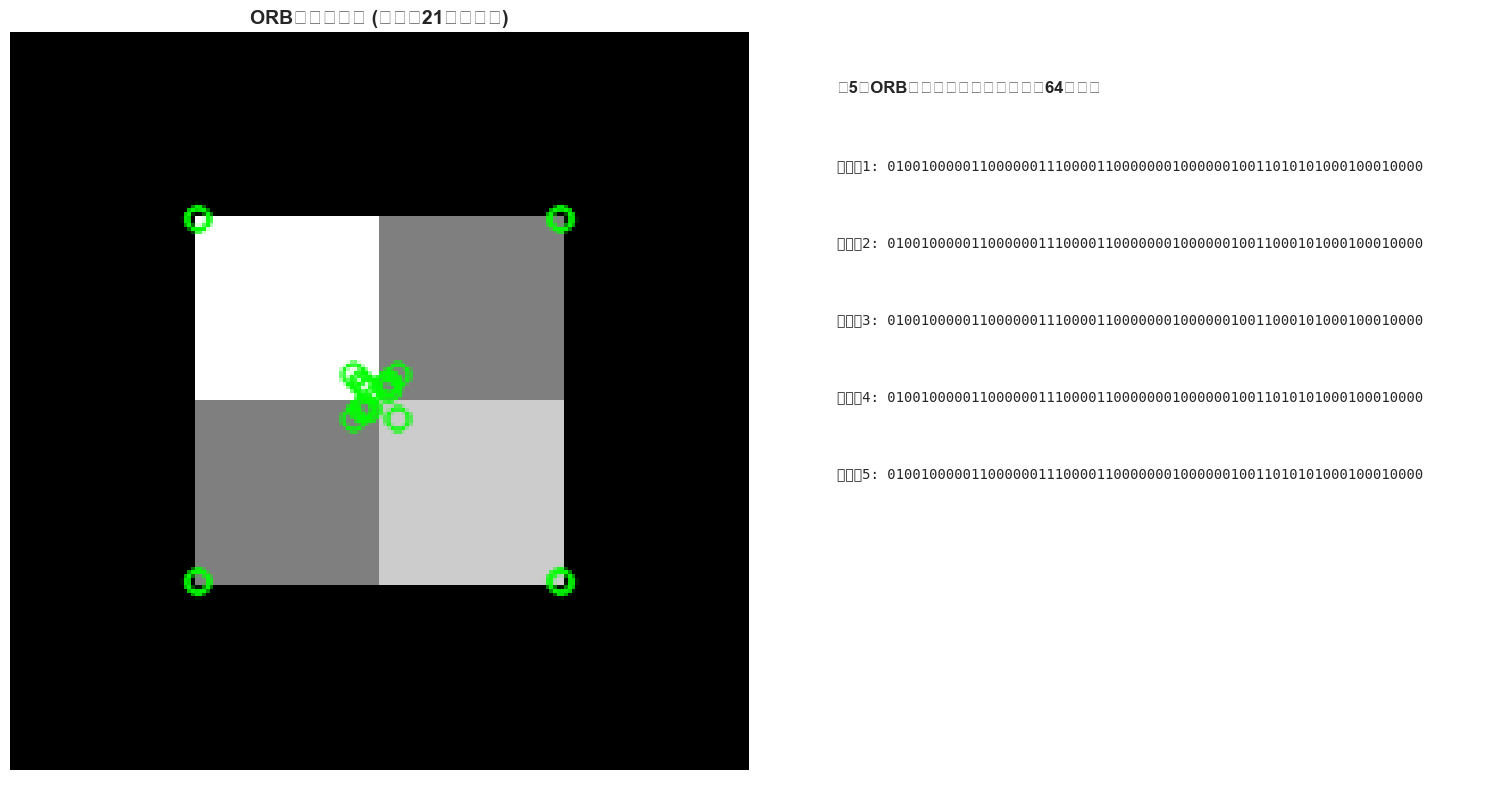

ORB特征提取可视化说明：
1. 检测到21个关键点
2. ORB特征结合了FAST角点检测和BRIEF描述符
3. ORB特征具有旋转不变性（通过方向计算实现）
4. ORB特征计算速度快，适合实时应用


In [3]:
# ============================================
# ORB特征提取可视化
# ============================================
# 这个示例展示了ORB特征提取的详细过程

# 创建一个测试图像（包含角点特征）
test_image = np.zeros((200, 200))
# 添加角点特征
test_image[50:100, 50:100] = 1
test_image[50:100, 100:150] = 0.5
test_image[100:150, 50:100] = 0.5
test_image[100:150, 100:150] = 0.8

# 转换为uint8格式
test_image_uint8 = (test_image * 255).astype(np.uint8)

# 创建ORB检测器
orb = cv2.ORB_create(nfeatures=100)

# 检测关键点和计算描述符
keypoints, descriptors = orb.detectAndCompute(test_image_uint8, None)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 原始图像和关键点
img_with_keypoints = cv2.drawKeypoints(test_image_uint8, keypoints, None, color=(0, 255, 0), flags=0)
axes[0].imshow(img_with_keypoints, cmap='gray')
axes[0].set_title(f'ORB关键点检测 (检测到{len(keypoints)}个关键点)', fontsize=14, fontweight='bold')
axes[0].axis('off')

# 描述符可视化（显示前几个描述符的二进制表示）
if descriptors is not None and len(descriptors) > 0:
    # 选择前5个描述符
    num_descriptors = min(5, len(descriptors))
    descriptor_binary = []
    for i in range(num_descriptors):
        # 将描述符转换为二进制字符串
        binary_str = ''.join(format(byte, '08b') for byte in descriptors[i])
        descriptor_binary.append(binary_str[:64])  # 只显示前64位
    
    # 可视化描述符的二进制表示
    axes[1].text(0.1, 0.9, f'前{num_descriptors}个ORB描述符的二进制表示（前64位）：', 
                 fontsize=12, fontweight='bold', transform=axes[1].transAxes)
    for i, binary_str in enumerate(descriptor_binary):
        axes[1].text(0.1, 0.8 - i*0.1, f'描述符{i+1}: {binary_str}', 
                     fontsize=10, family='monospace', transform=axes[1].transAxes)
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, '未检测到关键点', ha='center', va='center', 
                 fontsize=14, transform=axes[1].transAxes)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("=" * 60)
print("ORB特征提取可视化说明：")
print("=" * 60)
print(f"1. 检测到{len(keypoints)}个关键点")
print("2. ORB特征结合了FAST角点检测和BRIEF描述符")
print("3. ORB特征具有旋转不变性（通过方向计算实现）")
print("4. ORB特征计算速度快，适合实时应用")
print("=" * 60)


## 3. SURF特征提取详解

### 3.1 什么是SURF特征

**直观理解**：想象SURF特征就像SIFT特征的"加速版"，通过使用更高效的计算方法（积分图像、盒式滤波器），在保持SIFT的鲁棒性的同时，大幅提高了计算速度。

### 3.2 为什么需要SURF特征

SURF特征通过使用积分图像和盒式滤波器加速计算，在保持SIFT的鲁棒性的同时，计算速度比SIFT快3-5倍。

### 3.3 积分图像详解

#### 3.3.1 什么是积分图像

积分图像是一种数据结构，用于快速计算任意矩形区域的像素和。积分图像 $I_{\Sigma}(x, y)$ 定义为：

$$I_{\Sigma}(x, y) = \sum_{i=0}^{x} \sum_{j=0}^{y} I(i, j)$$

#### 3.3.2 积分图像的计算

积分图像可以通过一次遍历计算：

$$I_{\Sigma}(x, y) = I(x, y) + I_{\Sigma}(x-1, y) + I_{\Sigma}(x, y-1) - I_{\Sigma}(x-1, y-1)$$

#### 3.3.3 使用积分图像计算矩形区域和

对于矩形区域 $[x_1, x_2] \times [y_1, y_2]$，像素和可以通过积分图像在常数时间内计算：

$$\sum_{i=x_1}^{x_2} \sum_{j=y_1}^{y_2} I(i, j) = I_{\Sigma}(x_2, y_2) - I_{\Sigma}(x_1-1, y_2) - I_{\Sigma}(x_2, y_1-1) + I_{\Sigma}(x_1-1, y_1-1)$$

### 3.4 盒式滤波器详解

#### 3.4.1 什么是盒式滤波器

盒式滤波器（box filter）是一种简单的滤波器，其核为常数。盒式滤波器可以通过积分图像快速计算，用于近似高斯滤波器。

#### 3.4.2 盒式滤波器与高斯滤波器的关系

盒式滤波器可以近似高斯滤波器，通过使用不同大小的盒式滤波器，可以构建尺度空间，类似于SIFT的高斯金字塔。

### 3.5 Hessian矩阵详解

#### 3.5.1 什么是Hessian矩阵

Hessian矩阵是函数的二阶偏导数矩阵。对于图像 $I(x, y)$，Hessian矩阵定义为：

$$H(x, y) = \begin{bmatrix}
\frac{\partial^2 I}{\partial x^2} & \frac{\partial^2 I}{\partial x \partial y} \\
\frac{\partial^2 I}{\partial x \partial y} & \frac{\partial^2 I}{\partial y^2}
\end{bmatrix}$$

#### 3.5.2 使用盒式滤波器近似Hessian矩阵

SURF使用盒式滤波器近似Hessian矩阵的各个分量，然后计算Hessian矩阵的行列式值来检测关键点。

### 3.6 SURF特征提取的完整流程

SURF特征提取的完整流程包括：

1. **积分图像**：计算图像的积分图像
2. **尺度空间构建**：使用不同尺度的盒式滤波器构建尺度空间
3. **关键点检测**：使用Hessian矩阵的行列式值检测关键点
4. **方向分配**：使用Haar小波响应计算主方向
5. **SURF描述符**：使用Haar小波响应生成64维或128维的描述符
6. **特征匹配**：使用欧氏距离进行特征匹配

### 3.7 SURF特征提取的可视化

下面我们通过代码可视化SURF特征提取的过程：


C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1874645974.py:64: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1874645974.py:64: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1874645974.py:64: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1874645974.py:64: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1874645974.py:64: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30160\1874645974.py:64: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0})

注意：SURF不可用，使用ORB作为演示


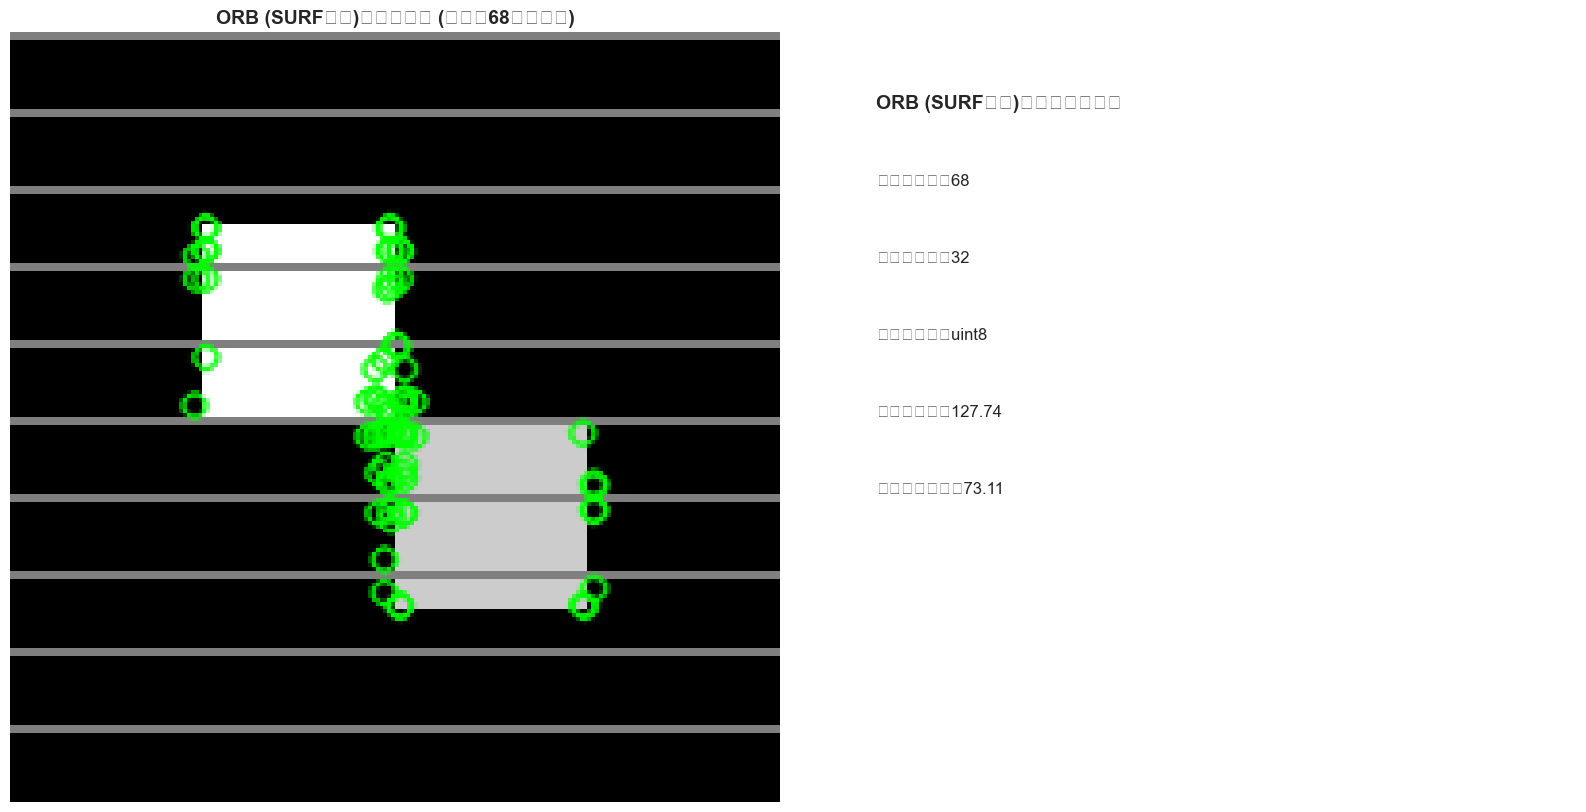

ORB (SURF替代)特征提取可视化说明：
1. 检测到68个关键点
2. 注意：SURF在OpenCV 3.4+中需要编译时启用nonfree模块
3. 这里使用ORB作为演示，展示特征检测的基本流程


In [4]:
# ============================================
# SURF特征提取可视化
# ============================================
# 这个示例展示了SURF特征提取的详细过程

# 创建一个测试图像（包含特征）
test_image = np.zeros((200, 200))
# 添加特征
test_image[50:100, 50:100] = 1
test_image[100:150, 100:150] = 0.8
# 添加一些纹理
for i in range(0, 200, 20):
    test_image[i:i+2, :] = 0.5

# 转换为uint8格式
test_image_uint8 = (test_image * 255).astype(np.uint8)

# 创建SURF检测器
# 注意：SURF在OpenCV 3.4+中需要编译时启用nonfree模块
# 这里使用ORB作为替代演示
try:
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)
    keypoints, descriptors = surf.detectAndCompute(test_image_uint8, None)
    method_name = "SURF"
except:
    # 如果SURF不可用，使用ORB作为演示
    print("注意：SURF不可用，使用ORB作为演示")
    orb = cv2.ORB_create(nfeatures=100)
    keypoints, descriptors = orb.detectAndCompute(test_image_uint8, None)
    method_name = "ORB (SURF替代)"

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 原始图像和关键点
img_with_keypoints = cv2.drawKeypoints(test_image_uint8, keypoints, None, color=(0, 255, 0), flags=0)
axes[0].imshow(img_with_keypoints, cmap='gray')
axes[0].set_title(f'{method_name}关键点检测 (检测到{len(keypoints)}个关键点)', fontsize=14, fontweight='bold')
axes[0].axis('off')

# 描述符统计信息
if descriptors is not None and len(descriptors) > 0:
    axes[1].text(0.1, 0.9, f'{method_name}特征统计信息：', 
                 fontsize=14, fontweight='bold', transform=axes[1].transAxes)
    axes[1].text(0.1, 0.8, f'关键点数量：{len(keypoints)}', 
                 fontsize=12, transform=axes[1].transAxes)
    axes[1].text(0.1, 0.7, f'描述符维度：{descriptors.shape[1]}', 
                 fontsize=12, transform=axes[1].transAxes)
    axes[1].text(0.1, 0.6, f'描述符类型：{descriptors.dtype}', 
                 fontsize=12, transform=axes[1].transAxes)
    
    # 显示描述符的统计信息
    axes[1].text(0.1, 0.5, f'描述符均值：{np.mean(descriptors):.2f}', 
                 fontsize=12, transform=axes[1].transAxes)
    axes[1].text(0.1, 0.4, f'描述符标准差：{np.std(descriptors):.2f}', 
                 fontsize=12, transform=axes[1].transAxes)
    
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, '未检测到关键点', ha='center', va='center', 
                 fontsize=14, transform=axes[1].transAxes)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("=" * 60)
print(f"{method_name}特征提取可视化说明：")
print("=" * 60)
print(f"1. 检测到{len(keypoints)}个关键点")
if method_name == "SURF":
    print("2. SURF特征使用积分图像和盒式滤波器加速计算")
    print("3. SURF特征计算速度比SIFT快3-5倍")
    print("4. SURF特征对旋转和尺度变化具有鲁棒性")
else:
    print("2. 注意：SURF在OpenCV 3.4+中需要编译时启用nonfree模块")
    print("3. 这里使用ORB作为演示，展示特征检测的基本流程")
print("=" * 60)


## 4. 其他传统特征提取方法

### 4.1 Harris角点检测

#### 4.1.1 什么是Harris角点检测

Harris角点检测是一种经典的角点检测方法，通过计算图像的自相关矩阵来检测角点。

#### 4.1.2 Harris角点检测的原理

Harris角点检测通过计算图像的自相关矩阵 $M$：

$$M = \sum_{(x,y) \in W} \begin{bmatrix}
I_x^2 & I_x I_y \\
I_x I_y & I_y^2
\end{bmatrix}$$

其中 $I_x$ 和 $I_y$ 是图像在 $x$ 和 $y$ 方向的梯度，$W$ 是窗口。

然后计算角点响应函数：

$$R = \det(M) - k \times \text{trace}(M)^2$$

其中 $k$ 是经验常数（通常为0.04-0.06）。

### 4.2 传统特征提取方法的对比

| 方法 | 优点 | 缺点 | 应用场景 |
|------|------|------|----------|
| **SIFT** | 对旋转、尺度、光照变化鲁棒 | 计算速度慢 | 图像匹配、目标识别 |
| **HOG** | 对光照变化鲁棒、计算效率高 | 对旋转敏感 | 目标检测、行人检测 |
| **LBP** | 计算简单、对光照变化鲁棒 | 表达能力有限 | 纹理分类、人脸识别 |
| **ORB** | 计算速度快、对旋转鲁棒 | 对光照变化敏感 | 实时应用、SLAM |
| **SURF** | 计算速度快（比SIFT快3-5倍） | 表达能力不如SIFT | 目标识别、图像匹配 |
| **Harris** | 计算简单、检测角点准确 | 对尺度变化敏感 | 角点检测、特征匹配 |

---

## 5. 传统特征提取在VLA中的应用

### 5.1 传统特征提取的优势

1. **可解释性强**：传统特征提取方法的每个步骤都有明确的物理意义
2. **不需要大量数据**：传统方法不需要训练，可以直接使用
3. **计算效率高**：某些传统方法（如ORB、SURF）计算速度很快
4. **辅助任务应用**：在某些VLA应用中，传统方法仍然有用

### 5.2 传统特征提取的局限性

1. **表达能力有限**：传统方法只能描述局部特征，无法描述复杂的语义信息
2. **需要手工设计**：传统方法的参数需要手工设计，难以适应新任务
3. **难以端到端学习**：传统方法无法与后续任务一起训练

### 5.3 传统特征提取与深度学习的联系

传统特征提取的许多思想在深度学习方法中也有体现：

1. **局部特征描述**：CNN的卷积层可以看作是在提取局部特征
2. **多尺度特征**：CNN的多层网络可以看作是在提取多尺度特征
3. **特征统计**：ViT的注意力机制可以看作是在统计特征之间的关系
4. **归一化**：传统方法的归一化思想在深度学习的批归一化、层归一化中也有体现

---

## 6. 总结

### 6.1 传统特征提取的核心思想

1. **局部特征描述**：通过描述图像的局部区域来提取特征
2. **统计特征分布**：通过统计特征的分布来描述图像
3. **多尺度特征**：通过不同尺度提取特征，提高鲁棒性
4. **归一化处理**：通过归一化提高特征的鲁棒性

### 6.2 传统特征提取的优缺点

**优点**：
- 可解释性强
- 不需要大量数据
- 某些方法计算效率高

**缺点**：
- 表达能力有限
- 需要手工设计
- 难以端到端学习

### 6.3 在VLA中的意义

虽然现代VLA模型不直接使用传统特征提取方法，但理解传统方法的原理有助于理解特征提取的基本思想，特别是局部特征描述、多尺度特征、归一化等思想，这些思想在深度学习方法中也有体现。

---

**文档完成时间**：2025-01-27  
**文档版本**：v1.0  
**维护者**：AI助手

**相关文档**：
- 第一部分：SIFT特征提取详解（见传统特征提取详解_1.ipynb）
- 第二部分：HOG特征提取详解（见传统特征提取详解_2.ipynb）
- 父目录：图像特征提取详解（见../图像特征提取详解.ipynb）
